# Linear Regression

## Calculating theta_0, theta_1

![](Fig/fig007.jpeg)

In [20]:
import numpy as np
def Linear_Regression_single(X,y):
    mean_x = np.mean(X)
    mean_y = np.mean(y)
    n = len(X)
    numer = 0
    denomin = 0
    for i in range(n):
        numer = numer + ((X[i] - mean_x) * (y[i] - mean_y))
        denomin = denomin + ((X[i] - mean_x) ** 2)
    m = numer / denomin
    b = mean_y - m * mean_x
  
    return(m,b)




In [23]:
def Linear_Regression_multi(x1,x2,y):
    mean_x1 = np.mean(x1)
    mean_x2 = np.mean(x2)
    mean_y = np.mean(y)
    n = len(x1)
    numer = 0
    denomin = 0
    for i in range(n):
        numer = numer + ((x1[i] - mean_x1) * (y[i] - mean_y))
        denomin = denomin + ((x1[i] - mean_x1) ** 2)
    m = numer / denomin
    
    numer = 0
    denomin = 0
    for i in range(n):
        numer = numer + ((x2[i] - mean_x2) * (y[i] - mean_y))
        denomin = denomin + ((x2[i] - mean_x2) ** 2)
    z = numer / denomin
    
    
    b = mean_y - m * mean_x1 - z * mean_x2
    return(z,m,b)

In [28]:

def predict_single(X,m,b):
    pred_y=[]
    for i in range(len(X)):
        pred_y.append(b + m * X[i])

    return(pred_y)


def predict_multi(x1,x2,z,m,b,ln):
    pred_y=[]
    for i in range(ln):
        pred_y.append(b + m * x1[i]+ z * x2[i])

    return(pred_y)

In [25]:
# Single variable

x=[95,85,80,70,60]
y = [85,95,70,65,70]

theta_1,theta_0 = Linear_Regression_single(x, y)
print('Slope = ' + str(theta_1) + '\nIntercept = ' + str(theta_0))

Slope = 0.6438356164383562
Intercept = 26.78082191780822


In [16]:
y = theta_0+theta_1*2 
y

28.06849315068493

In [17]:
predict_single([80],theta_1,theta_0)[0]

78.2876712328767

In [44]:
# Multi variable

x1 = [95,85,80,70,60]
x2= [80,70,60,50,55]
y = [85,95,70,65,70]

theta_2, theta_1,theta_0 = Linear_Regression_multi(x1,x2, y)
print('Slope = ' + str([theta_2,theta_1]) + '\nIntercept = ' + str(theta_0))

Slope = [0.853448275862069, 0.6438356164383562]
Intercept = -26.986419461502123


In [33]:
predict_multi([80],[75],theta_2,theta_1,theta_0,1)[0]

79.57534246575342

## Single variant LR

y = c+mx

or we can say 

y = theta_0 + theta_1 * x  

In [45]:
import pandas as pd
import math
import numpy as np


In [77]:
def diff(x,y,theta_0,theta_1):
    hat =[]
    ls =[]
    for i in x:
        hat.append(theta_0 + theta_1 * i)
    for i in range(len(y)):
        ls.append((y[i]-hat[i])**2)

    return hat,ls
        

In [78]:
x = [1,2,3,4]
y = [2,2.5,3.5,6]
theta_0,theta_1 = 1,2
y_hat, difference = diff(x,y,theta_0,theta_1)
df = pd.DataFrame([x,y,y_hat, difference])
df = df.transpose()
df.columns = ['x','y','yhat','diff']
df

,x,y,yhat,diff
0,1.0,2.0,3.0,1.00
1,2.0,2.5,5.0,6.25
2,3.0,3.5,7.0,12.25
3,4.0,6.0,9.0,9.00


![](Fig/fig66.PNG)

![](Fig/fig69.PNG)

In [79]:
cost = (df['diff'].sum())/(2*df['diff'].shape[0])
cost

3.5625

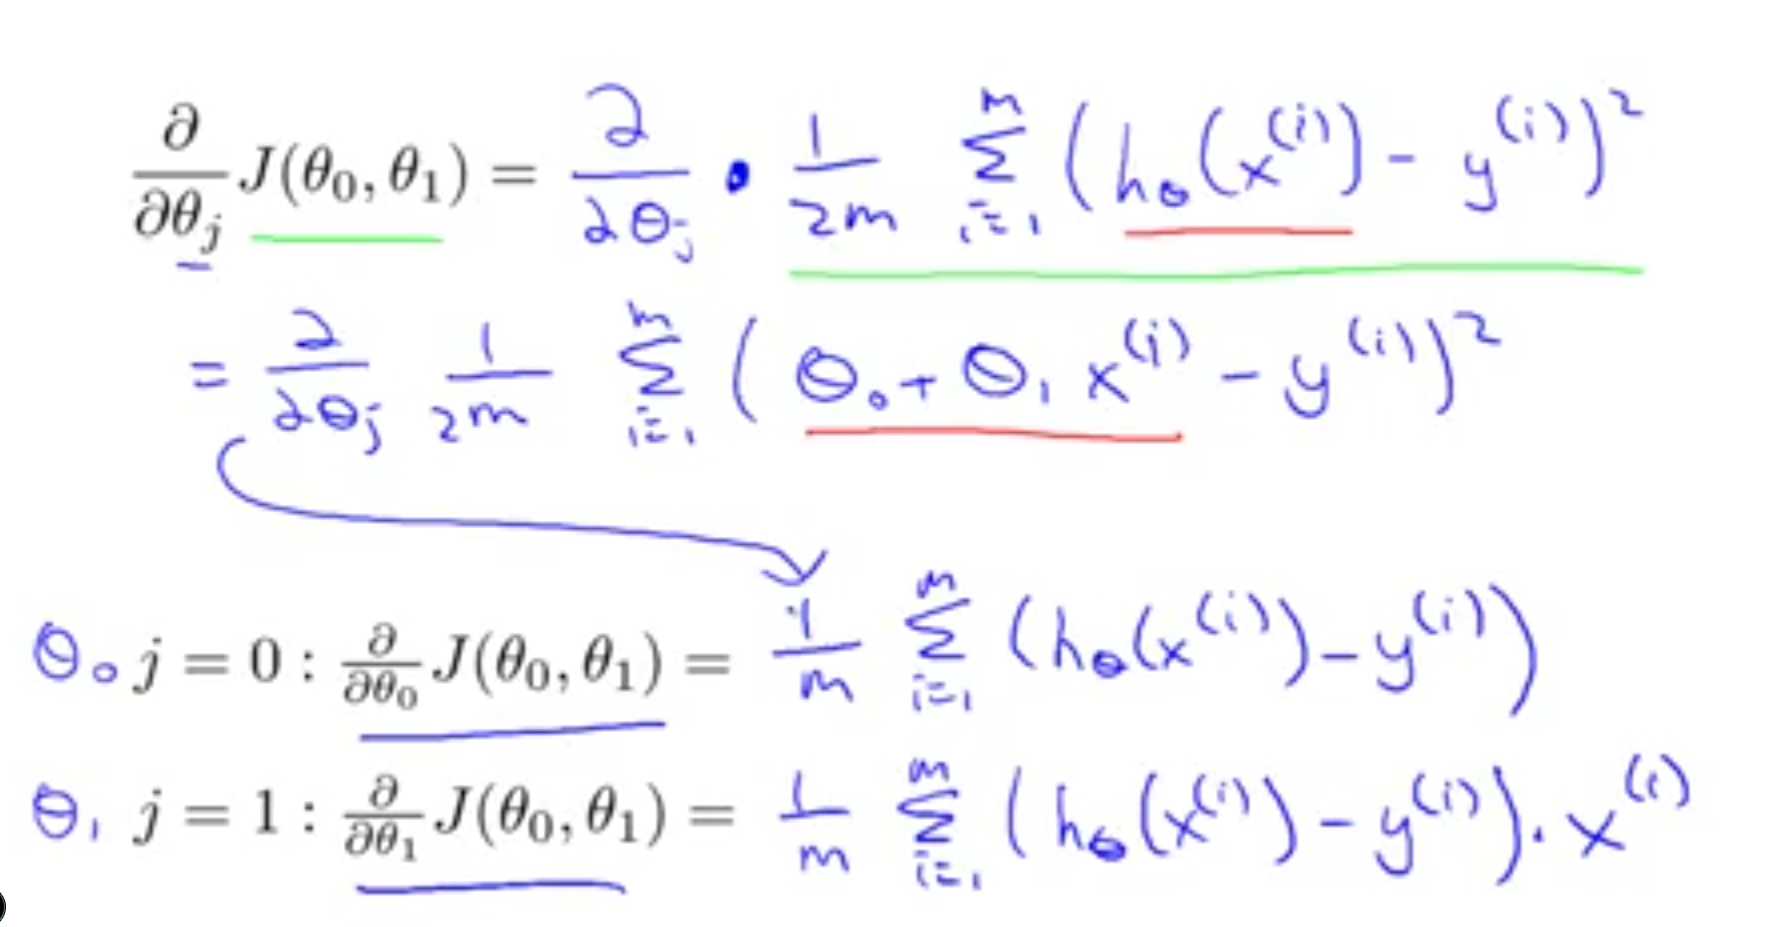


![](Fig/fig67.PNG)

![](Fig/fig70.PNG)

![](Fig/fig71.PNG)

In [80]:
step_size = 0.01
print((step_size/df['diff'].shape[0]),(np.sqrt(df['diff']).sum()))
print(theta_0 - (step_size/df['diff'].shape[0])*(np.sqrt(df['diff']).sum()))
theta_0 = theta_0 - (step_size/df['diff'].shape[0])*(np.sqrt(df['diff']).sum())

0.0025 10.0
0.975


![](Fig/fig68.PNG)

![](Fig/fig72.PNG)

![](Fig/fig73.PNG)

In [81]:
print((step_size/df['diff'].shape[0]),((np.sqrt(df['diff'])*x).sum()))
print(theta_1 - (step_size/df['diff'].shape[0])*((np.sqrt(df['diff'])*x).sum()))
theta_1 = theta_1 - (step_size/df['diff'].shape[0])*((np.sqrt(df['diff'])*x).sum())

0.0025 28.5
1.92875


In [83]:
theta_0,theta_1

(0.975, 1.92875)

theta_0 and theta_1 are now updated. So can goto next iteration

In [82]:
x = [1,2,3,4]
y = [2,2.5,3.5,6]
y_hat, difference = diff(x,y,theta_0,theta_1)
df = pd.DataFrame([x,y,y_hat, difference])
df = df.transpose()
df.columns = ['x','y','yhat','diff']
df

,x,y,yhat,diff
0,1.0,2.0,2.90375,0.816764
1,2.0,2.5,4.83250,5.440556
2,3.0,3.5,6.76125,10.635752
3,4.0,6.0,8.69000,7.236100


## Multi variable LR

![](Fig/fig74.PNG)

![](Fig/fig75.PNG)

In [108]:
def diff(x1,x2,y,theta_0,theta_1,theta_2):
    hat =[]
    ls =[]
    for i,j in zip(x1,x2):
        hat.append(theta_0 + theta_1 * i + theta_2 * j)
        
    for i in range(len(y)):
        ls.append((y[i]-hat[i])**2)

    return hat,ls
        

![](Fig/fig76.PNG)

![](Fig/fig77.PNG)

In [109]:
x1 = [1,2.5,2,3]
x2 = [1.5,3,3,3.5]
y = [ 3,5,4,6]
theta_0,theta_1,theta_2 = 1,2,1.5
y_hat, difference = diff(x1,x2,y,theta_0,theta_1,theta_2)
df = pd.DataFrame([x1,x2,y,y_hat, difference])
df = df.transpose()
df.columns = ['x1','x2','y','yhat','diff']
df

,x1,x2,y,yhat,diff
0,1.0,1.5,3.0,5.25,5.0625
1,2.5,3.0,5.0,10.50,30.2500
2,2.0,3.0,4.0,9.50,30.2500
3,3.0,3.5,6.0,12.25,39.0625


![](Fig/fig78.PNG)

![](Fig/fig79.PNG)

In [110]:
cost = (df['diff'].sum())/(2*df['diff'].shape[0])
cost

13.078125

![](Fig/fig80.PNG)

![](Fig/fig81.PNG)

In [111]:
step_size = 0.01
print((step_size/df['diff'].shape[0]),(np.sqrt(df['diff']).sum()))
print(theta_0 - (step_size/df['diff'].shape[0])*(np.sqrt(df['diff']).sum()))
theta_0 = theta_0 - (step_size/df['diff'].shape[0])*(np.sqrt(df['diff']).sum())

0.0025 19.5
0.95125


![](Fig/fig82.PNG)

![](Fig/fig83.PNG)

In [112]:
print((step_size/df['diff'].shape[0]),((np.sqrt(df['diff'])*x1).sum()))
print(theta_1 - (step_size/df['diff'].shape[0])*((np.sqrt(df['diff'])*x1).sum()))
theta_1 = theta_1 - (step_size/df['diff'].shape[0])*((np.sqrt(df['diff'])*x1).sum())

0.0025 45.75
1.885625


![](Fig/fig84.PNG)


In [113]:
print((step_size/df['diff'].shape[0]),((np.sqrt(df['diff'])*x2).sum()))
print(theta_2 - (step_size/df['diff'].shape[0])*((np.sqrt(df['diff'])*x2).sum()))
theta_2 = theta_2 - (step_size/df['diff'].shape[0])*((np.sqrt(df['diff'])*x2).sum())

0.0025 58.25
1.354375


In [114]:
theta_0,theta_1,theta_2

(0.95125, 1.885625, 1.354375)

theta_0, theta_1 and theta_2 are now updated. So can goto next iteration

In [115]:
x1 = [1,2.5,2,3]
x2 = [1.5,3,3,3.5]
y = [ 3,5,4,6]

y_hat, difference = diff(x1,x2,y,theta_0,theta_1,theta_2)
df = pd.DataFrame([x1,x2,y,y_hat, difference])
df = df.transpose()
df.columns = ['x1','x2','y','yhat','diff']
df

,x1,x2,y,yhat,diff
0,1.0,1.5,3.0,4.868438,3.491059
1,2.5,3.0,5.0,9.728438,22.358121
2,2.0,3.0,4.0,8.785625,22.902207
3,3.0,3.5,6.0,11.348437,28.605784


# Normalization

![](Fig/fig3.PNG)

**Standardization/Z-score normalization**

![](Fig/fig4.PNG)

In [116]:
# https://www.hackerrank.com/challenges/s10-standard-deviation/problem
import statistics as st
import math
siz = int(input())
vals = list(map(int, input().split()))
vals.sort()
mean = st.mean(vals)

ss=[]
for val in vals:
    value = val-mean
    ss.append(pow(value, 2))

sd =  math.sqrt(sum(ss)/len(ss))


print('{:.1f}'.format(sd))


 5
 10 40 30 50 20


14.1






**Normalization(MinMaX)**

![](Fig/fig5.PNG)

![](Fig/fig6.PNG)

**Mean normalization**

![](Fig/fig85.PNG)

In [2]:
x1 = [0.5,0.7,1.2]
x2 = [10,22,16]
x3 = [221,330,870]

import pandas as pd

df = pd.DataFrame([x1,x2,x3])
df = df.transpose()

In [3]:
df.columns = ['x1','x2','x3']
df

,x1,x2,x3
0,0.5,10.0,221.0
1,0.7,22.0,330.0
2,1.2,16.0,870.0


In [4]:
print('Mean of x1',df.x1.mean())
print('Min of x1',df.x1.min())
print('Max of x1',df.x1.max())
print('\n')
print('Mean of x2',df.x2.mean())
print('Min of x2',df.x2.min())
print('Max of x2',df.x2.max())
print('\n')
print('Mean of x3',df.x3.mean())
print('Min of x3',df.x3.min())
print('Max of x3',df.x3.max())
print('\n')

Mean of x1 0.7999999999999999
Min of x1 0.5
Max of x1 1.2


Mean of x2 16.0
Min of x2 10.0
Max of x2 22.0


Mean of x3 473.6666666666667
Min of x3 221.0
Max of x3 870.0




In [5]:
df['x1_norm']=(df.x1-df.x1.mean())/(df.x1.max()-df.x1.min())
df['x2_norm']=(df.x2-df.x2.mean())/(df.x2.max()-df.x2.min())
df['x3_norm']=(df.x3-df.x3.mean())/(df.x3.max()-df.x3.min())

In [6]:
df

,x1,x2,x3,x1_norm,x2_norm,x3_norm
0,0.5,10.0,221.0,-0.428571,-0.5,-0.389317
1,0.7,22.0,330.0,-0.142857,0.5,-0.221366
2,1.2,16.0,870.0,0.571429,0.0,0.610683


This scalling of data is between -1<x<1. So to rescale the data you'll need to multiply the answer with rescaling factor. i.e. rescale it to -0.5<x<0.5 so multiply the answer with 0.5

In [7]:
rescale_factor = 0.5

df2 = df[['x1_norm','x2_norm','x3_norm']]
df2*0.5  # Rescaled data

,x1_norm,x2_norm,x3_norm
0,-0.214286,-0.25,-0.194658
1,-0.071429,0.25,-0.110683
2,0.285714,0.00,0.305342


# Logistic Regression



![](Fig/fig88.PNG)

![](Fig/fig86.PNG)

![](Fig/fig87.PNG)

In [15]:
import math
import numpy as np
import pandas as pd
def sigmoid(x):
    return 1/(1+math.exp(x))

In [16]:
round(sigmoid(1 + 1 * 0.5 + 2 * 1.5))

0

In [17]:
def diff(x1,x2,y,theta_0,theta_1,theta_2):
    hat =[]
    ls =[]
    for i,j in zip(x1,x2):
        hat.append(round(sigmoid(theta_0 + theta_1 * i + theta_2 * j)))

    for i in range(len(y)):
        ls.append((y[i]-hat[i]))

    return hat,ls
        

In [18]:
x1 = [0.5,1.5,1,1.5]
x2 = [1.5,1,1.5,2]
y = [0,1,1,1]
theta_0,theta_1,theta_2 = 1,1,2
y_hat, difference = diff(x1,x2,y,theta_0,theta_1,theta_2)
df = pd.DataFrame([x1,x2,y,y_hat, difference])
df = df.transpose()
df.columns = ['x1','x2','y','yhat','diff']
df

,x1,x2,y,yhat,diff
0,0.5,1.5,0.0,0.0,0.0
1,1.5,1.0,1.0,0.0,1.0
2,1.0,1.5,1.0,0.0,1.0
3,1.5,2.0,1.0,0.0,1.0


![](Fig/fig89.PNG)

In [20]:
cost = ((-df.y*np.log2(df.yhat))-((1-df.y)*np.log2(1-df.yhat))).sum()/df.y.shape[0]
cost

inf

![](Fig/fig90.PNG)

In [21]:
step_size = 0.01
print((step_size/df['diff'].shape[0]),(np.sqrt(df['diff']).sum()))
print(theta_0 - (step_size/df['diff'].shape[0])*(df['diff'].sum()))
theta_0 = theta_0 - (step_size/df['diff'].shape[0])*(df['diff'].sum())

0.0025 3.0
0.9925


In [23]:
print((step_size/df['diff'].shape[0]),((df['diff']*x1).sum()))
print(theta_1 - (step_size/df['diff'].shape[0])*(((df['diff']*x1).sum())))
theta_1 = theta_1 - (step_size/df['diff'].shape[0])*((df['diff']*x1).sum())

0.0025 4.0
0.99


In [24]:
print((step_size/df['diff'].shape[0]),((df['diff']*x2).sum()))
print(theta_2 - (step_size/df['diff'].shape[0])*((df['diff']*x2).sum()))
theta_2 = theta_2 - (step_size/df['diff'].shape[0])*((df['diff']*x2).sum())

0.0025 4.5
1.98875


In [25]:
theta_0, theta_1, theta_2

(0.9925, 0.99, 1.98875)

theta_0, theta_1 and theta_2 are now updated. So can goto next iteration

In [26]:
x1 = [0.5,1.5,1,1.5]
x2 = [1.5,1,1.5,2]
y = [0,1,1,1]
y_hat, difference = diff(x1,x2,y,theta_0,theta_1,theta_2)
df = pd.DataFrame([x1,x2,y,y_hat, difference])
df = df.transpose()
df.columns = ['x1','x2','y','yhat','diff']
df

,x1,x2,y,yhat,diff
0,0.5,1.5,0.0,0.0,0.0
1,1.5,1.0,1.0,0.0,1.0
2,1.0,1.5,1.0,0.0,1.0
3,1.5,2.0,1.0,0.0,1.0


# KMeans

In [28]:
x = [1,1,2,3,4,4,5,6]
y = [1,2,2,1,4,5,6,7]

x1,y1 = 3,2
x2,y2 = 5,5

import pandas as pd

df = pd.DataFrame([x,y]).transpose()
df.columns = ['x','y']
df

,x,y
0,1,1
1,1,2
2,2,2
3,3,1
4,4,4
5,4,5
6,5,6
7,6,7


In [29]:
df['dis_from_first_centroid'] = (df.x-x1)**2+(df.y-y1)**2
df['dis_from_second_centroid'] = (df.x-x2)**2+(df.y-y2)**2
df

,x,y,dis_from_first_centroid,dis_from_second_centroid
0,1,1,5,32
1,1,2,4,25
2,2,2,1,18
3,3,1,1,20
4,4,4,5,2
5,4,5,10,1
6,5,6,20,1
7,6,7,34,5


**Labeling**

In [30]:
df1 = df.iloc[:4][['x','y','dis_from_first_centroid']]
df1

,x,y,dis_from_first_centroid
0,1,1,5
1,1,2,4
2,2,2,1
3,3,1,1


In [31]:
df2 = df.iloc[4:][['x','y','dis_from_second_centroid']]
df2

,x,y,dis_from_second_centroid
4,4,4,2
5,4,5,1
6,5,6,1
7,6,7,5


**Centroid update**

In [32]:
x1 = df1.x.sum()/df1.x.shape[0]
y1 = df1.y.sum()/df1.y.shape[0]
x1,y1

(1.75, 1.5)

In [33]:
x2 = df2.x.sum()/df2.x.shape[0]
y2 = df2.y.sum()/df2.y.shape[0]
x2,y2

(4.75, 5.5)



![](Fig/fig47.PNG)

In [40]:
sm = df1.dis_from_first_centroid.sum()+df2.dis_from_second_centroid.sum()
cost = sm/df1.shape[0]+df2.shape[0]
cost

9.0

# KNN

In [29]:
import pandas as pd

x = [3,1,3,4,5,6,7,3,1]
y = [4,2,3,5,5,5,7,1,1]
label = ['x','x','x','o','x','o','x','o','o']

df = pd.DataFrame([x,y,label]).transpose()
df.columns=['x','y','label']
df

,x,y,label
0,3,4,x
1,1,2,x
2,3,3,x
3,4,5,o
4,5,5,x
5,6,5,o
6,7,7,x
7,3,1,o
8,1,1,o


In [34]:
x1,y1,k = 3,4,3

df['dis_from_new_point'] = (df.x-x1)**2+(df.y-y1)**2
df.sort_values('dis_from_new_point', inplace=True)
df

,x,y,label,dis_from_new_point
0,3,4,x,0
2,3,3,x,1
3,4,5,o,2
4,5,5,x,5
1,1,2,x,8
7,3,1,o,9
5,6,5,o,10
8,1,1,o,13
6,7,7,x,25


In [41]:
df.iloc[:k]

,x,y,label,dis_from_new_point
0,3,4,x,0
2,3,3,x,1
3,4,5,o,2


In [43]:
new_point_label = df.iloc[:k].label.max()
new_point_label

'x'

# Naive Bayes



**See lec 11**

# Decision Tree

In [5]:
# Entroty of full dataset 
import math

yes_data = 9
no_data = 5
su = yes_data+no_data
print(yes_data,no_data,su)
print('For yes',yes_data/su,math.log2(yes_data/su))
print('For no',no_data/su,math.log2(no_data/su))
total_entropy = -(yes_data/su)*math.log2(yes_data/su)-(no_data/su)*math.log2(no_data/su)
print(total_entropy)

9 5 14
For yes 0.6428571428571429 -0.6374299206152917
For no 0.35714285714285715 -1.4854268271702418
0.9402859586706311
